# **Project Scope**

Having a well-defined structure before performing a task helps in efficient execution of the task. This is true even in cases of building a machine learning model. Once you have built a model on a dataset, you can easily break down the steps and define a structured Machine learning pipeline.

This notebook coveres the process of building an end-to-end Machine Learning pipeline and implementing it on  BigMart sales prediction dataset.


The dataset contains information about the stores, products and historical sales. We will predict the sales of the products in the stores.

We will start by building a prototype machine learning pipeline that will help us define the actual machine learning pipeline.

In [1]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration and Preprocessing

In [45]:
#loading train data
train = pd.read_csv("/content/Train.csv")

In [ ]:
#check for missing values
train.isnull().sum()

Only Item_Weight and Outlet_Size have missing values.

Item_Weight is a continuous variable. We can use either mean or median to impute the missing values, but here we will use mean.

Outlet_Size is a categorical variable so will use mode to impute the missing values in the column.

In [47]:
#impute missing values in Item_Weight using mean
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean()) 
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [48]:
#impute missing values in Outlet_Size using mode
train['Outlet_Size'] = train['Outlet_Size'].fillna(str(train['Outlet_Size'].mode()))
train['Outlet_Size']

0                           Medium
1                           Medium
2                           Medium
3       0    Medium\ndtype: object
4                             High
                   ...            
8518                          High
8519    0    Medium\ndtype: object
8520                         Small
8521                        Medium
8522                         Small
Name: Outlet_Size, Length: 8523, dtype: object

Machine learning models cannot work with categorical(string) data. We will convert the categorical variables into numeric types.

In [49]:
#checking categorical variables in the data
#Write your code here
categorical_columns = train.select_dtypes(include="object")
categorical_columns.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

Our data has the following categorical variables

* Item_Identifier
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Size
* Outlet_Type
* Outlet_Location_Type

We will use the categorical_encorders library to convert these variables into binary variables. We will not convert Item_Identifier.

In [50]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
 
#create an object of OneHotEncorder
#We need to convert some of the categorical data into numerical data so we require label encoder
encoder = LabelEncoder()
#encode the variables
cols_to_encode = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier']
for col in cols_to_encode:
    train[col] = encoder.fit_transform(train[col])
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

Now that we have taken care of our categorical variables, we move on to the continous variables.
We will nnormalize the data in such a way that the range of all variables is almost similar.
We will use the StandardScaler function to do this.

In [51]:
from sklearn.preprocessing import StandardScaler
#create an object of the StandardScaler
scaler = StandardScaler()
#fit with the Item_MRP
#transform the data

scaled_train = scaler.fit_transform(train['Item_MRP'].values.reshape(-1, 1))
scaled_train




array([[ 1.74745381],
       [-1.48902325],
       [ 0.01004021],
       ...,
       [-0.89720755],
       [-0.60797692],
       [-1.05226104]])

In [52]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,0,1,...,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,0,0,...,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,0,1,...,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.000000,6,182.0950,0,1998,732.3800,0,0,...,0,0,0,0,0,1,1,0,0,0
4,1297,8.93,0.000000,9,53.8614,1,1987,994.7052,0,1,...,1,0,0,0,0,1,0,1,0,0


# Building the Model
We will use the Linear Regression and the Random Forest Regressor to predict the sales. We will create a validation set using the train_test_split() function.

test_size = 0.25 such that the validation set holds 25% of the data points while the train set has 75%.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#seperate the independent and target variable
x=train.drop(columns = ["Item_Outlet_Sales"])
y=train["Item_Outlet_Sales"]

#split the data
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.25, random_state=1)



In [54]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,0,1,...,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,0,0,...,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,0,1,...,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.000000,6,182.0950,0,1998,732.3800,0,0,...,0,0,0,0,0,1,1,0,0,0
4,1297,8.93,0.000000,9,53.8614,1,1987,994.7052,0,1,...,1,0,0,0,0,1,0,1,0,0


In [56]:
#shape of train test splits
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(6392, 23)
(2131, 23)
(6392,)
(2131,)


Now that we have split our data, we will train a linear regression model on this data and check its performance on the validation set. We will use RMSE as an evaluation metric.

In [57]:
#LinearRegression
lin_reg = LinearRegression()
#fit the model
lin_reg.fit(x_train,y_train)

#predict the target on train and validation data
y_train_pred = lin_reg.predict(x_train)
y_val_pred = lin_reg.predict(x_val)

# RMSE on train and validation data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

In [58]:
print(mse_train, mse_val)

1274895.4558601875 1261922.9834175555


We will train a random forest regressor and see if we can get an improvement on the train and validation errors.

In [59]:
#RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
#fitting the model
rf_reg.fit(x_train, y_train)
#predict the target on train and validation data
train_pred_rf = rf_reg.predict(x_train)
val_pred_rf = rf_reg.predict(x_val)

#RMSE on train and test data
rf_mse_train = mean_squared_error(y_train, train_pred_rf)
rf_mse_val = mean_squared_error(y_val, val_pred_rf)


In [60]:
print(rf_mse_train , rf_mse_val)

178259.3871918282 1298242.589114114


We can see a significant improvement on the RMSE values. The random forest algorithm gives us 'feature importance for all the variables in the data.

We have 45 features and not all of these features may be useful in forecasting. We will select the top 7 features which had a major contribution in forecasting sales values.

If the model performance is similar in both cases (by using 45 features and by using 7 features), then we should only use the top 7 features, in order to keep the model simple and efficient.

The goal is to have a less complex model without compromising on the overall model performance.

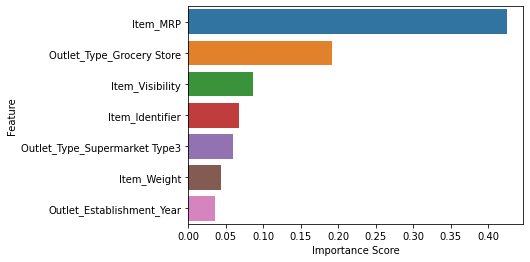

In [61]:
import seaborn as sns
#plot the 7 most important features
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 7 most important features
feat_importances = pd.DataFrame({'Feature':x_train.columns[indices[:7]],
                                  'Importance':importances[indices[:7]]})

# Create a horizontal bar chart of the top 7 features
sns.barplot(x='Importance', y='Feature', data=feat_importances)

# Set the axis labels
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Show the plot
plt.show()


In [62]:
#training data with top 7 features
X_train_important = x_train.iloc[:, indices[:7]]
rf_reg.fit(X_train_important,y_train)
#validation data with top 7 important features
y_pred = rf_reg.predict(X_train_important)

# Evaluate the performance of your model on the selected features
RMSE_score = mean_squared_error(y_train,y_pred)
#create an object of the RandomForestRegressor Model
rf_reg1 = RandomForestRegressor(n_estimators=100, random_state=0)


In [63]:
RMSE_score

185818.75850275208

Using only 7 features has given us almost the same perfomance as the previous model where we were using 45 features. Now we will identify the final set of features that we need and the preprocessing steps for each of them.

# Identifying features to build the Machine Learning pipeline
We must list down the final set of features and necessary preprocessing steps for each of them, to be used in the ML pipeline. Since the RandomForestRegressor model with 7 features gave us almost the same performance as the previous model with 45 features, we will only use these features for our ML pipeline.

# Selected features and preprocessing steps
* **Item_MRP:** It holds the price of the products. During the preprocessing step we used a standard scaler to scale these values.
* **Outlet_Type_Grocery Store:** A binary column which indcates if the outlet type is a grocery store or not. To use this information in the model building process, we will add a binary feature in the existing data that contains 1 (if outlet type is a grocery store) and 0 (if the outlet type is something else).
* **Item_Visibility:** Denotes visibility of products in the store. Since this variable had a small value range and no missing values, we did not apply any preprocessing steps on this variable.
* **Outlet_Type_Supermarket Type3:** Another binary column indicating if the outlet type is a 'supermarket_type_3' or not. To capture this information we will create a binary feature that stores 1 (if outlet type is supermarket_type_3) and 0 (if not).
* **Outlet_Identifier_OUT027:8** This feature specifies whether the outlet identifier is 'OUT027' or not. Similar to the  previous example, we will create a seperate column that carries 1 (if outlet identifier is OUT027) or 0 (if otherwise).
* **Outlet_Establishment_Year:** This describes the year of establishment of the stores. Since we did not perform any transformation on values in this column, we will not preprocess it in the pipeline.
* **Item_Weight:** During preprocessing we observed that this column had missing values. These missing values were imputed using the average of the column. This has to be taken into account while building the pipeline.

We will drop the other columns since we will not use them to train the model.


# Pipeline Design
We have built a prototype to understand the preprocessing requirement for our data. It is now time to form a pipeline design based on our learning from the prototype. We will define the pipeline in 3 stages:

1. Create the required binary features
2. Perform required data preprocessing and transformations:
*  Drop the columns that are not required
*  Missing value imputation (Item_Weight) by average
*  Scale the Item_MRP
3. Random Forest Regressor

# 1. Create the required binary features
We will create a custom transformer that will add 3 new binary columns to the existing data.

* Outlet_Type: Grocery Store
* Outlet_Type: Supermarket Type3
* Outlet_Identifier_OUT027

# 2. Data Preprocessing and transformations
We will use a column transformer to do the required transformations. It will contain 3 steps:

* Drop the columns that are not required for model training
* Impute missing values in the column Item_Weight using the average
* Scale the column Item_MRP using StandardScaler()

# 3. Use the model to predict the target on the cleaned data
This will be the final step in the pipeline. In the last two steps we preprocessed the data and made it ready for the model building process. We will use this data and build a machine learning model to predict the Item Outlet Sales.

# Building the pipeline
We will read the data set and seperate the independent and target variable from the training dataset.

In [21]:
#importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [64]:
#read training dataset
train2 = pd.read_csv("/content/Train.csv")
clean_data = train

In [ ]:
train.dtypes

In [66]:
#seperate the independent and target variables
X = clean_data.drop(columns = ['Item_Outlet_Sales'])
y = clean_data['Item_Outlet_Sales']

We need to create 3 new binary columns using a custom transformer. Here are the steps we need to follow to create a custom transformer.

* Define a class OutletTypeEncoder
* Add the parameter BaseEstimator while defining the class
* The class must contain fit and transform methods
* In the transform method, we will define all the 3 columns that we want after the first stage in our ML pipeline.

In [141]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
    
class OutletTypeEncoder(BaseEstimator):
    
    def __init__(self, base_estimator=None):
        self.base_estimator = base_estimator
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        X['Outlet_Type_Grocery Store'] = (train2['Outlet_Type'] == 'Grocery Store').astype(int)
        X['Outlet_Type_SupermarketType3'] = (train2['Outlet_Type'] == 'Supermarket Type3').astype(int)
        X['Outlet_Identifier_OUT027'] = (train2['Outlet_Identifier'] == 'OUT027').astype(int)
        return X


Next we will define the pre-processing steps required before the model building process.

* Drop the columns – Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year
* Impute missing values in column Item_Weight with mean
* Scale the column Item_MRP using StandardScaler().
This will be the second step in our machine learning pipeline. After this step, the data will be ready to be used by the model to make predictions.

In [69]:
# Drop the columns - 
X = X.drop(columns=['Item_Identifier', 'Outlet_Identifier','Item_Type', 'Outlet_Identifier','Outlet_Establishment_Year'])
# Impute the missing values in column Item_Weight by mean
X['Item_Weight'] = X['Item_Weight'].fillna(X['Item_Weight'].mean()) 
# Scale the data in the column Item_MRP
scaled_train = scaler.fit_transform(X['Item_MRP'].values.reshape(-1, 1))


# Predict the target
This will be the final block of the machine learning pipeline. We will specify 3 steps – create binary columns, preprocess the data, train a model.

When we use the fit() function with a pipeline object, all three steps are executed. Post the model training process, we use the predict() function that uses the trained model to generate the predictions.

In [142]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X, y, test_size=0.25, random_state=42)
# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
pipeline = Pipeline([
    ('outlet_encoder', OutletTypeEncoder()),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])
# fit the pipeline with the training data
pipeline.fit(X_train,Y_train)

# predict target values on the training data
#Write your code here
train_predictions = pipeline.predict(X_validate)

Now, we will read the test data set and we call predict function only on the pipeline object to make predictions on the test data.

In [100]:
# read the test data
test = pd.read_csv("/content/Test.csv")

In [ ]:
# predict target variables on the test data 
y_sub = pipeline.predict(test)
y_sub

In [ ]:
sub = pd.read_csv("Submission.csv")
sub["Item_Outlet_Sales"] = y_sub
sub.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1646.054836
1,1,FDW14,OUT017,1305.429801
2,2,NCN55,OUT010,658.423251
3,3,FDQ58,OUT017,2333.948545
4,4,FDY38,OUT027,5954.092896


In [ ]:
sub.to_csv("submission.csv", index=False)